In [1]:
!pip install ultralytics


Defaulting to user installation because normal site-packages is not writeable


Load libraries

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
from ultralytics import YOLO
from pathlib import Path

Helper Function (Read Image from URL)

In [3]:
def imread_from_url(url):
    response = requests.get(url)
    img_array = np.frombuffer(response.content, np.uint8)
    img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
    return img

Load YOLOv8 Pretrained Model

In [8]:
#  YOLOv8 model 
model = YOLO("yolov8m.pt")

Object Detection on IMAGE (URL)

In [9]:
def detect_from_image_url(img_url):
    image = imread_from_url(img_url)

    # Run YOLOv8 inference
    results = model(image, conf=0.25, iou=0.5)

    # Plot detections
    output_img = results[0].plot()
    output_img = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(12, 10))
    plt.imshow(output_img)
    plt.axis("off")
    plt.title("YOLOv8 Object Detection")
    plt.show()

    # Print detection details
    for i, box in enumerate(results[0].boxes):
        cls_id = int(box.cls[0])
        cls_name = model.names[cls_id]
        conf = float(box.conf[0])
        x1, y1, x2, y2 = box.xyxy[0]

        print(f"Detection {i+1}:")
        print(f"  Class: {cls_name}")
        print(f"  Confidence: {conf:.2f}")
        print(f"  Box: ({x1:.1f}, {y1:.1f}) → ({x2:.1f}, {y2:.1f})")


WARNING ⚠️ 'source' is missing. Using 'source=/home/amma/.local/lib/python3.10/site-packages/ultralytics/assets'.

image 1/2 /home/amma/.local/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 4 persons, 1 bus, 166.7ms
image 2/2 /home/amma/.local/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 3 persons, 2 ties, 127.1ms
Speed: 1.4ms preprocess, 146.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


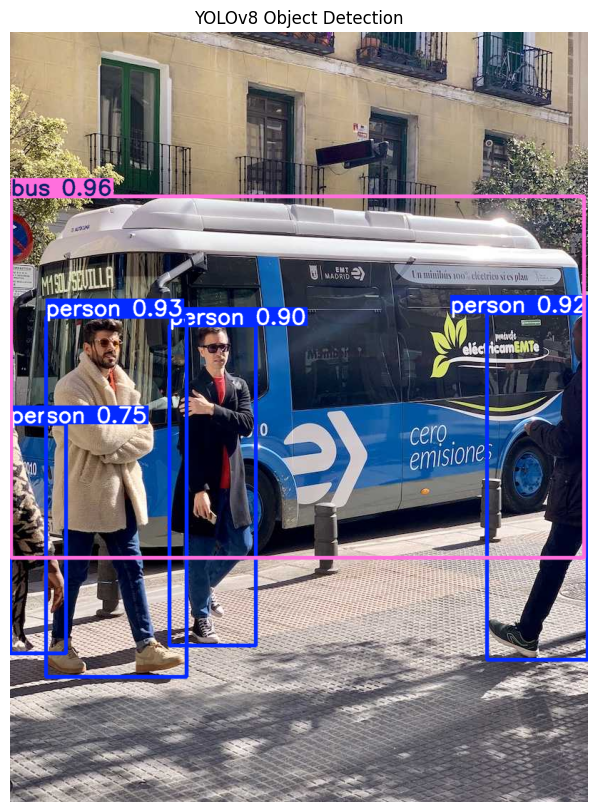

Detection 1:
  Class: bus
  Confidence: 0.96
  Box: (1.4, 230.7) → (804.7, 737.9)
Detection 2:
  Class: person
  Confidence: 0.93
  Box: (50.2, 399.5) → (247.6, 904.9)
Detection 3:
  Class: person
  Confidence: 0.92
  Box: (668.8, 395.0) → (809.7, 880.4)
Detection 4:
  Class: person
  Confidence: 0.90
  Box: (223.1, 411.5) → (344.7, 860.2)
Detection 5:
  Class: person
  Confidence: 0.75
  Box: (0.3, 549.1) → (78.5, 871.7)


In [10]:
img_url = "https://storage.googleapis.com/kagglesdsdata/datasets/4107330/7166601/Vehicle_Detection_Image_Dataset/sample_image.jpg"
detect_from_image_url(img_url)



0: 480x640 24 persons, 2 bicycles, 16 cars, 1 bus, 3 trucks, 1 fire hydrant, 7 handbags, 146.6ms
Speed: 1.7ms preprocess, 146.6ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


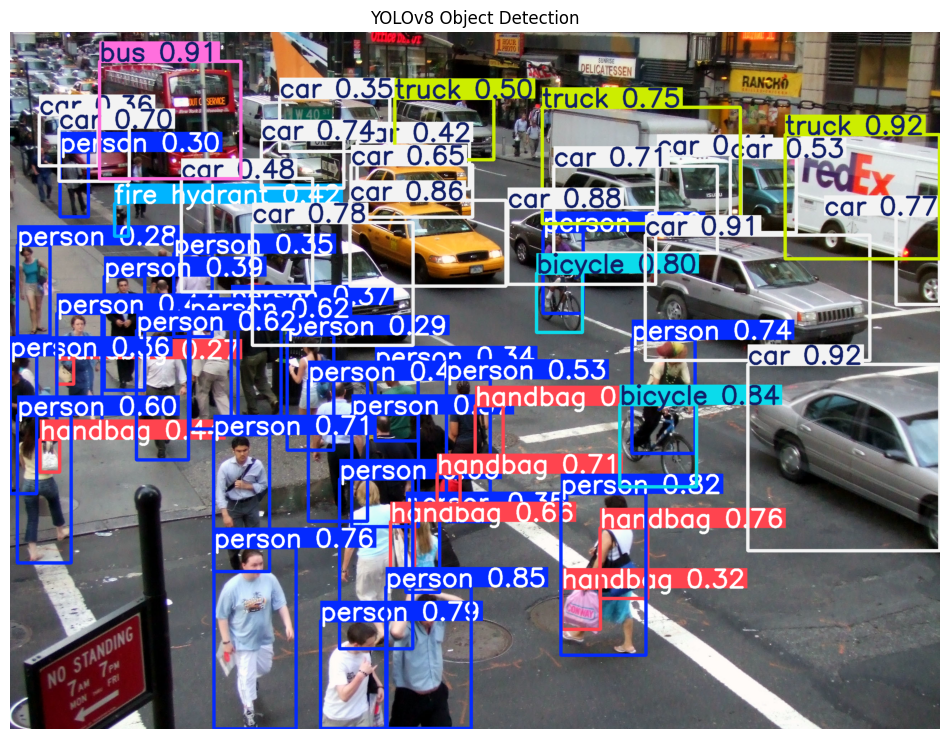

Detection 1:
  Class: car
  Confidence: 0.92
  Box: (2056.6, 928.6) → (2591.0, 1447.2)
Detection 2:
  Class: truck
  Confidence: 0.92
  Box: (2161.0, 288.4) → (2590.8, 634.1)
Detection 3:
  Class: car
  Confidence: 0.91
  Box: (1770.9, 568.9) → (2396.6, 917.7)
Detection 4:
  Class: bus
  Confidence: 0.91
  Box: (249.6, 84.6) → (643.1, 411.7)
Detection 5:
  Class: car
  Confidence: 0.88
  Box: (1387.4, 491.1) → (1799.8, 705.9)
Detection 6:
  Class: car
  Confidence: 0.86
  Box: (947.1, 471.1) → (1382.7, 710.0)
Detection 7:
  Class: person
  Confidence: 0.85
  Box: (1047.8, 1548.6) → (1285.5, 1942.8)
Detection 8:
  Class: bicycle
  Confidence: 0.84
  Box: (1699.6, 1040.4) → (1913.5, 1269.1)
Detection 9:
  Class: person
  Confidence: 0.82
  Box: (1535.3, 1288.6) → (1772.0, 1738.5)
Detection 10:
  Class: bicycle
  Confidence: 0.80
  Box: (1467.3, 674.4) → (1595.7, 839.9)
Detection 11:
  Class: person
  Confidence: 0.79
  Box: (865.7, 1642.2) → (1050.2, 1942.9)
Detection 12:
  Class: car
  

In [12]:
img_url = "https://live.staticflickr.com/13/19041780_d6fd803de0_3k.jpg"
detect_from_image_url(img_url)

Object Detection on VIDEO

In [25]:
def detect_from_video(video_path, output_path="10yolov8_output.avi"):
    cap = cv2.VideoCapture(video_path)

    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    fourcc = cv2.VideoWriter_fourcc(*"XVID")
    writer = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        results = model(frame, conf=0.25, iou=0.5)
        annotated_frame = results[0].plot()

        writer.write(annotated_frame)

    cap.release()
    writer.release()
    print("Saved output video as:", output_path)


In [26]:
detect_from_video("/home/amma/Downloads/sample_video.mp4")


0: 384x640 3 cars, 1 truck, 114.8ms
Speed: 1.2ms preprocess, 114.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 101.3ms
Speed: 0.8ms preprocess, 101.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 1 truck, 118.7ms
Speed: 1.0ms preprocess, 118.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 99.4ms
Speed: 0.8ms preprocess, 99.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 1 truck, 103.3ms
Speed: 0.8ms preprocess, 103.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 1 truck, 105.0ms
Speed: 1.3ms preprocess, 105.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 cars, 1 truck, 102.1ms
Speed: 0.8ms preprocess, 102.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 1 truck, 102.9ms
Speed: 1.4ms preproc